Considering the equations reported in [this document](darcy_and_transport_equations.ipynb), we assume that the following quantities are constant and related to the geothermal and hydrostatic gradient
* the water $\rho_w$ and rock $\rho_r$ density 
* the water $\lambda_w$ and rock $\lambda_r$ thermal conductivity
* the water $c_w$ and the rock $c_r$ specific heat capacity
* the dynamic viscosity $\mu$

moreover, we assume that the domain is a flat rectangle with outward normal parallel to $\mathbf{e}_3$.

Everything marked with a `[*]` can be modified by user needs. Do not change the name in the dictionary `data`.

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import porepy as pp
import matplotlib.pyplot as plt

from darcy_and_transport_data import detect_fractures, Simulation, create_grid

Upgrade to   meshio 1.11.12    available! (installed: 1.11.9)

To upgrade meshio with pip, type

   pip install -U meshio

To upgrade _all_ pip-installed packages, use

   pipdate/pipdate3

To disable these checks, set SecondsBetweenChecks in /home/elle/.config/pipdate/config.ini to -1.


In [3]:
data = dict()

#[*] path for the fracture network file name
data['file'] = 'network.csv'

#[*] folder to store the simulation results
data['folder'] = 'results'

#[*] activate to export solution in vtu format (for ParaView)
data['save_solution'] = True

# ------ general properties ------

#[*] depth of the problem, unit [m]
data['depth'] = 2 * (pp.KILOMETER)

#[*] atmospheric temperature, unit [*C]
data['atmospheric_temperature'] = 20 * (pp.CELSIUS)

# geothermal gradient, [*C/m]
data['geothermal_gradient'] = 25 * (pp.CELSIUS/pp.KILOMETER)

# ------ fracture/rock properties ------
data['fracture'] = dict()
data['rock'] = dict()

#[*] define the fracture and rock permeability, unit [m^2 or Darcy]
data['fracture']['permeability'] = 1e-2 * (pp.MILLIDARCY)
data['rock']['permeability'] = 1e-5 * (pp.MILLIDARCY)

#[*] define the fracture and rock porosity, unit []
data['fracture']['porosity'] = 0.5
data['rock']['porosity'] = 0.02

#[*] define the fracture aperture, unit [m]
data['fracture']['aperture'] = 3 * (pp.MILLIMETER)

# ------ well properties ------
data['wells'] = dict()

#[*] define the well positions, unit [m]
data['wells']['position'] = (pp.METER) * np.array([[ 250, 44],
                                                    [350, 124]])

#[*] define the well volumetric flow rate, unit [m^3/s]
data['wells']['flow_rate'] = np.array([1e-4, -1e-4]) * (pp.METER**3/pp.SECOND)

#[*] define the temperature at well, unit [*C]
data['wells']['temperature'] = np.array([20, 20]) * (pp.CELSIUS)

# ------discretization properties ------

#[*] domain bounding box, unit [m]
data['domain'] = {'xmin': 0 * (pp.KILOMETER), 'xmax': 0.75 * (pp.KILOMETER), 
                  'ymin': 0 * (pp.KILOMETER), 'ymax': 0.65 * (pp.KILOMETER)}

#[*] define the mesh size of the problem
data['mesh_size'] = 100 * (pp.METER)

#[*] end time for the simulation [s]
data['end_time'] = 10 * (pp.YEAR)

#[*] number of time steps
data['number_time_steps'] = 10

# geometrical tolerance for the computations, unit [m]
data['tol'] = 1e-4 * (pp.METER)

To plot the fracture network and the wells, it can be used to place correctly the wells.

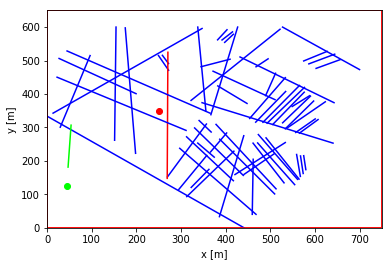

In [4]:
# import the fractures from the csv file
pts, edges = pp.importer.lines_from_csv(data['file'], tol=data['tol'])

# detect the fractures closest to the wells
data['wells']['fracture'], color = detect_fractures(data['wells']['position'], pts, edges)

# plot the fractures and the wells in blue
pp.plot_fractures(data['domain'], pts, edges, plot=False, fig_id=1, colortag=color)
pp.plot_wells(data['domain'], data['wells']['position'], plot=False, fig_id=1, colortag=data['wells']['fracture'])

plt.figure(1)
plt.xlabel('x [m]')    
plt.ylabel('y [m]')    
plt.show()

Run single-phase flow and transport models.

In [6]:
# run the simulation and save the solution
simulation = Simulation(data)
simulation.solve(save_as="temperature")

NameError: name 'density' is not defined